<a href="https://colab.research.google.com/github/ChetanKrishna07/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import librosa

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pathMain = "/content/drive/MyDrive/datasets/cremad/AudioWAV/"
dir_list = os.listdir(pathMain)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [6]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(pathMain + i)

df = pd.DataFrame(emotion, columns=['labels'])
df['source'] = 'CREMA-D'
df = pd.concat([df, pd.DataFrame(path, columns=['path'])], axis=1)
df.head()


,labels,source,path
0,male_angry,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
1,male_disgust,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
2,male_fear,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
3,male_happy,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
4,male_neutral,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...


In [7]:
df['labels'].value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  7442 non-null   object
 1   source  7442 non-null   object
 2   path    7442 non-null   object
dtypes: object(3)
memory usage: 174.5+ KB


In [9]:
def plot_random():
  f = plt.figure()
  f.set_figwidth(8)
  f.set_figheight(16)
  idx = np.random.randint(0, len(df))
  data, sr = librosa.load(df['path'][idx], sr=44100)
  emotion = df['labels'][idx]
  plt.subplot(4, 1, 1)
  plt.title(f'Sound wave of- {emotion}')
  librosa.display.waveshow(data, sr=sr)
  plt.subplot(4, 1, 2)
  plt.title('Time v/s Frequency')
  D = np.abs(librosa.stft(data))
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
  plt.colorbar()
  plt.subplot(4, 1, 3)
  plt.title('log-scaled')
  DB = librosa.amplitude_to_db(D, ref=np.max)
  librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log');
  plt.colorbar(format='%+2.0f db')
  plt.subplot(4, 1, 4)
  plt.magnitude_spectrum(data, scale='dB')
  plt.show()

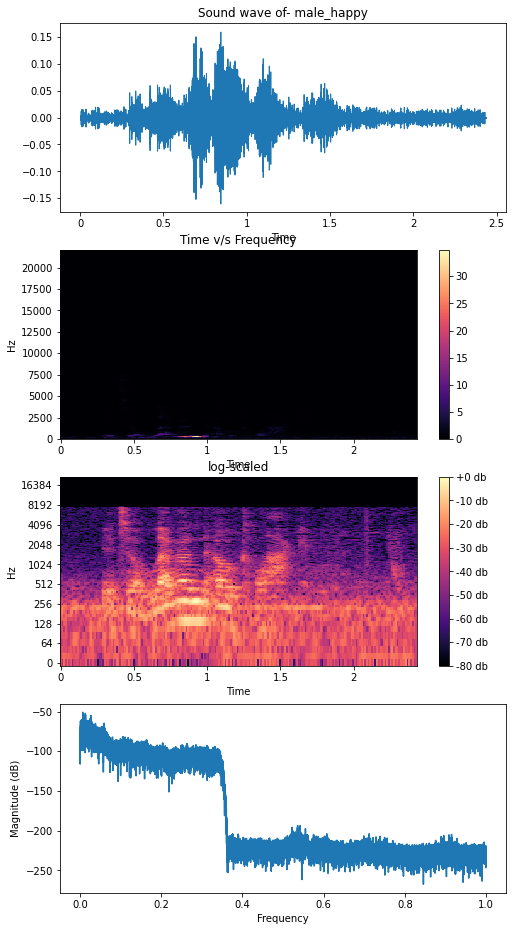

In [10]:
plot_random()

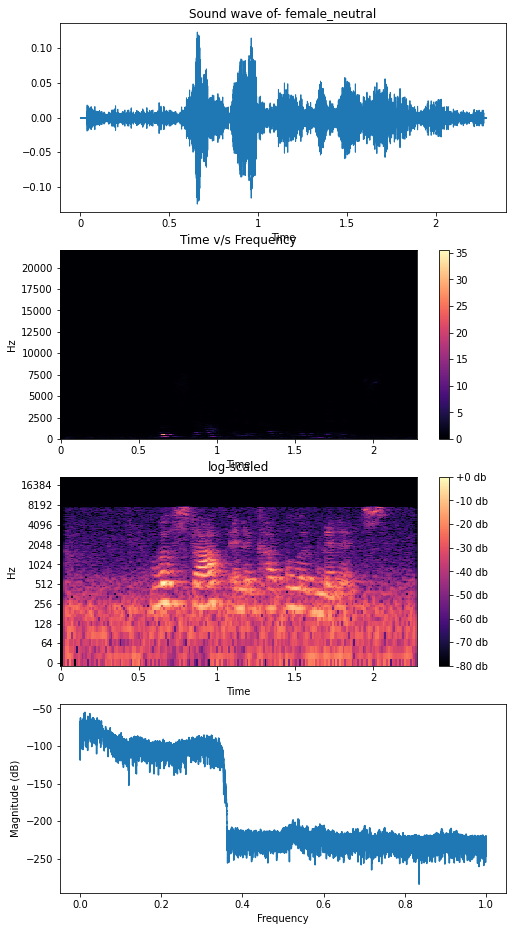

In [11]:
plot_random()

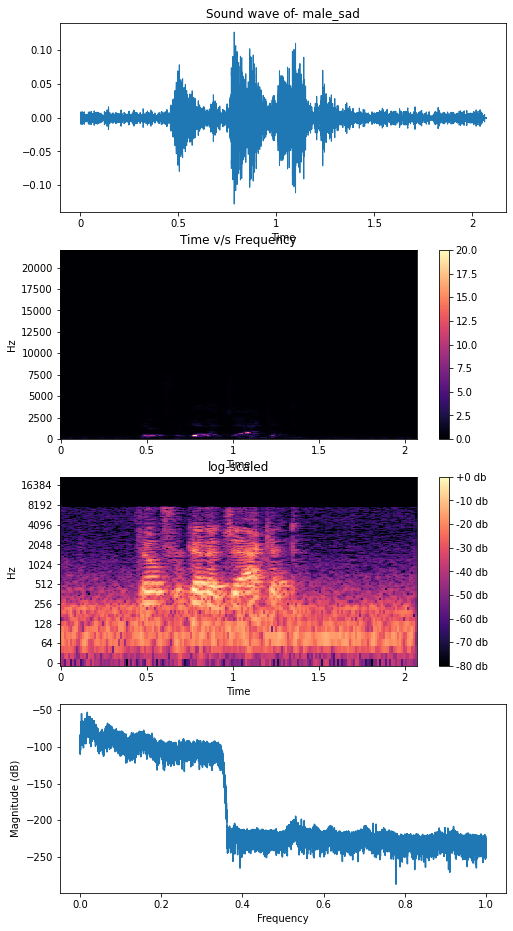

In [12]:
plot_random()

In [13]:
df.head()

,labels,source,path
0,male_angry,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
1,male_disgust,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
2,male_fear,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
3,male_happy,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...
4,male_neutral,CREMA-D,/content/drive/MyDrive/datasets/cremad/AudioWA...


In [14]:
df.shape

(7442, 3)

from tqdm import tqdm
X = []
y = []
mfccs = []
for i in tqdm(range(df.shape[0])):
  audio, sr = librosa.load(df.path[i], sr=44000)
  X.append(audio)
  y.append(df.labels[i])
  mfcc = librosa.feature.mfcc(y = audio, sr=44000, n_mfcc=20)
  mfcc = mfcc.T
  mfccs.append(mfcc)

features_df = pd.DataFrame({"X": X, "y": y, "mfccs": mfccs})

In [15]:
def feature_extract(i):
  audio, sr = librosa.load(df.path[i], sr=44000)
  y = df.labels[i]
  mfcc = librosa.feature.mfcc(y = audio, sr=44000, n_mfcc=20)
  mfcc = mfcc.T
  return audio, y, mfcc

In [16]:
from multiprocessing import Pool
from tqdm import tqdm
with Pool() as p:
  results = list(tqdm(p.imap(feature_extract, range(df.shape[0])), total=df.shape[0]))

X, y, mfccs = zip(*results)

100%|██████████| 7442/7442 [04:24<00:00, 28.12it/s]


features_df = pd.DataFrame({"X": X, "y": y, "mfccs": mfccs})
features_df.head()

features_df.to_pickle("/content/drive/MyDrive/datasets/cremad/CREMA_D_MFCCS.pkl")

features_read = pd.read_pickle("/content/drive/MyDrive/datasets/cremad/CREMA_D_MFCCS.pkl")

features_read.head()

In [17]:
def plot_random_mfccs():
  idx = np.random.randint(0, len(X))
  librosa.display.specshow(mfccs[idx], x_axis='time')
  plt.title(f'MFCCs of {y[idx]}')
  plt.colorbar()
  plt.tight_layout()
  plt.show()

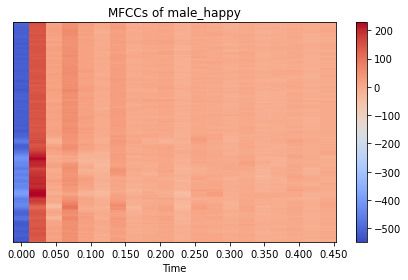

In [18]:
plot_random_mfccs()

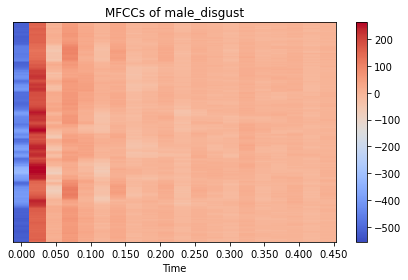

In [19]:
plot_random_mfccs()

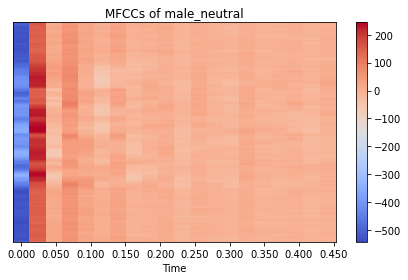

In [20]:
plot_random_mfccs()

In [21]:
def label_encode(y):
  if y == 'male_angry':
    return 0
  if y == 'male_disgust':
    return 1
  if y == 'male_fear':
    return 2
  if y == 'male_happy':
    return 3
  if y == 'male_sad':
    return 4
  if y == 'female_angry':
    return 5
  if y == 'female_disgust':
    return 6
  if y == 'female_fear':
    return 7
  if y == 'female_happy':
    return 8
  if y == 'female_sad':
    return 9
  if y == 'male_neutral':
    return 10
  if y == 'female_neutral':
    return 11

In [22]:
y = np.array(y)
y_label = np.array(list(map(label_encode, y)))

In [23]:
y_label

array([ 0,  1,  2, ...,  8, 11,  9])

In [24]:
y

array(['male_angry', 'male_disgust', 'male_fear', ..., 'female_happy',
       'female_neutral', 'female_sad'], dtype='<U14')

In [25]:
mfccs[0].shape

(196, 20)

In [26]:
mfccs[1].shape

(201, 20)

In [27]:
mfccs[134].shape

(236, 20)

In [28]:
mfccs[0]

array([[-6.21889038e+02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.21889038e+02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.99640930e+02,  2.95826302e+01,  2.45235538e+01, ...,
         4.74531353e-02, -7.53682852e-01, -9.78352904e-01],
       ...,
       [-4.99072632e+02,  1.13753204e+02,  3.49048309e+01, ...,
        -2.10910606e+00, -3.37010336e+00, -4.18586254e-01],
       [-4.98464172e+02,  1.14583862e+02,  3.46159668e+01, ...,
        -6.46345234e+00, -8.08340073e+00, -6.37836933e+00],
       [-5.16554260e+02,  1.06780838e+02,  3.99078674e+01, ...,
        -5.84441948e+00, -5.86808300e+00, -5.98912334e+00]], dtype=float32)

In [29]:
maxlen = max([len(f) for f in mfccs])
mfccs_padded = tf.keras.preprocessing.sequence.pad_sequences(mfccs, padding='post', dtype='float32', maxlen=maxlen)
mfccs_padded.shape

(7442, 431, 20)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mfccs_padded, y_label, test_size=0.25, random_state=0)

In [31]:
X_train.shape, y_train.shape

((5581, 431, 20), (5581,))

In [96]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, 5,padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(12))
model.add(layers.Activation('softmax'))

In [97]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_52 (Conv1D)          (None, 431, 256)          25856     
                                                                 
 activation_78 (Activation)  (None, 431, 256)          0         
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 53, 256)          0         
 g1D)                                                            
                                                                 
 dropout_52 (Dropout)        (None, 53, 256)           0         
                                                                 
 conv1d_53 (Conv1D)          (None, 53, 128)           163968    
                                                                 
 activation_79 (Activation)  (None, 53, 128)           0         
                                                     

In [98]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [99]:
history = model.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
559/559 [==============================] - 4s 4ms/step - loss: 4.7244 - accuracy: 0.0925
Epoch 2/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4841 - accuracy: 0.0889
Epoch 3/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4256 - accuracy: 0.1218
Epoch 4/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3727 - accuracy: 0.1467
Epoch 5/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3490 - accuracy: 0.1580
Epoch 6/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3289 - accuracy: 0.1562
Epoch 7/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3362 - accuracy: 0.1527
Epoch 8/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3214 - accuracy: 0.1654
Epoch 9/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3291 - accuracy: 0.1518
Epoch 10/50
559/559 [==============================] - 2s 4ms/step - loss: 2.5006 - accuracy: 0.0975

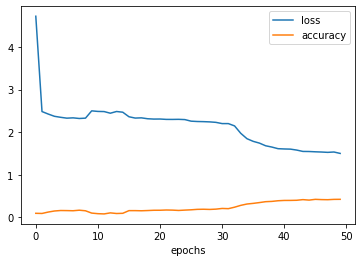

In [100]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [101]:
model.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.5680 - accuracy: 0.4025


[1.5680304765701294, 0.40247178077697754]

Model 0:
- Accuracy: 40.46%
- loss: 1.63

In [102]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers


model1 = Sequential()
model1.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling1D(pool_size=(8)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(128, 5,padding='same'))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling1D(pool_size=(4)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(12))
model1.add(layers.Activation('softmax'))

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model1.fit(X_train, y_train,batch_size=10, epochs=100)

Epoch 1/100
559/559 [==============================] - 4s 4ms/step - loss: 4.4392 - accuracy: 0.0878
Epoch 2/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4852 - accuracy: 0.0883
Epoch 3/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4844 - accuracy: 0.0873
Epoch 4/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4832 - accuracy: 0.0910
Epoch 5/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4835 - accuracy: 0.0910
Epoch 6/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4856 - accuracy: 0.0926
Epoch 7/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4846 - accuracy: 0.0930
Epoch 8/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4913 - accuracy: 0.0905
Epoch 9/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4840 - accuracy: 0.0914
Epoch 10/100
559/559 [==============================] - 2s 4ms/step - loss: 2.4828 - accura

KeyboardInterrupt: ignored

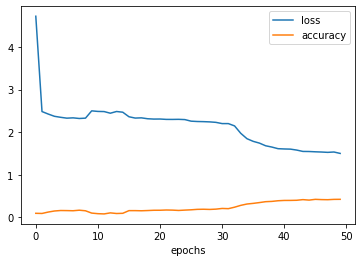

In [103]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [104]:
model1.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 2.4831 - accuracy: 0.0795


[2.483123302459717, 0.07952713966369629]

Model 1:
- Accuracy: 8%
- Loss: 2.48%

In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(8)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv1D(128, 5,padding='same'))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(4)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Flatten())
model2.add(layers.Dense(64))
model2.add(layers.Dense(12))
model2.add(layers.Activation('softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model2.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
559/559 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0930
Epoch 2/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 3/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 4/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 5/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 6/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 7/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 8/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 9/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 10/50
559/559 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0935
Epoch 11/50
559/559 [========

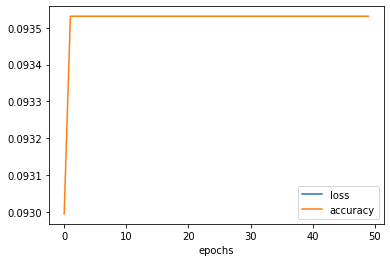

In [106]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [107]:
model2.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0801


[nan, 0.08006448298692703]

Model 2:
- Accuracy: 8%
- Loss: nan

In [108]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model3 = Sequential()
model3.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling1D(pool_size=(8)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv1D(128, 5,padding='same'))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling1D(pool_size=(4)))
model3.add(layers.Dropout(0.1))
model3.add(layers.Flatten())
model3.add(layers.Dense(128))
model3.add(layers.Dense(12))
model3.add(layers.Activation('softmax'))

model3.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model3.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
559/559 [==============================] - 4s 4ms/step - loss: 4.3199 - accuracy: 0.1140
Epoch 2/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4174 - accuracy: 0.1466
Epoch 3/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3937 - accuracy: 0.1432
Epoch 4/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4544 - accuracy: 0.1236
Epoch 5/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4530 - accuracy: 0.1249
Epoch 6/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4527 - accuracy: 0.1190
Epoch 7/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4519 - accuracy: 0.1288
Epoch 8/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4508 - accuracy: 0.1229
Epoch 9/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4529 - accuracy: 0.1159
Epoch 10/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4490 - accuracy: 0.1245

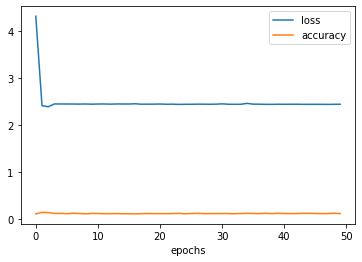

In [109]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [110]:
model3.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 2.4541 - accuracy: 0.1220


[2.4541261196136475, 0.12197743356227875]

Model 3:
- Accuracy: 8%
- Loss: 2.489

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model4 = Sequential()
model4.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling1D(pool_size=(8)))
model4.add(layers.Dropout(0.2))
model4.add(layers.Conv1D(128, 5,padding='same'))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling1D(pool_size=(4)))
model4.add(layers.Dropout(0.1))
model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Dense(12))
model4.add(layers.Activation('softmax'))

model4.compile(optimizer=tf.keras.optimizers.experimental.AdamW(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model4.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
559/559 [==============================] - 4s 4ms/step - loss: 4.3594 - accuracy: 0.0910
Epoch 2/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4873 - accuracy: 0.0930
Epoch 3/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4857 - accuracy: 0.0907
Epoch 4/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4851 - accuracy: 0.0898
Epoch 5/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4825 - accuracy: 0.1014
Epoch 6/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4751 - accuracy: 0.1113
Epoch 7/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4626 - accuracy: 0.1188
Epoch 8/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4589 - accuracy: 0.1249
Epoch 9/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4667 - accuracy: 0.1199
Epoch 10/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4517 - accuracy: 0.1165

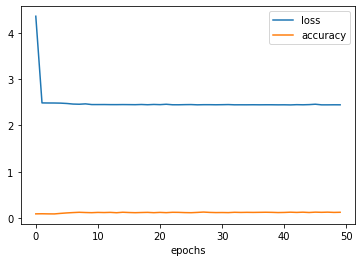

In [113]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [114]:
model4.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 2.4532 - accuracy: 0.1080


[2.4532313346862793, 0.10800644755363464]

In [115]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model5 = Sequential()
model5.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model5.add(layers.Activation('relu'))
model5.add(layers.MaxPooling1D(pool_size=(8)))
model5.add(layers.Dropout(0.2))
model5.add(layers.Conv1D(128, 5,padding='same'))
model5.add(layers.Activation('relu'))
model5.add(layers.MaxPooling1D(pool_size=(4)))
model5.add(layers.Dropout(0.1))
model5.add(layers.Conv1D(64, 5,padding='same'))
model5.add(layers.Activation('relu'))
model5.add(layers.MaxPooling1D(pool_size=(4)))
model5.add(layers.Dropout(0.1))
model5.add(layers.Flatten())
model5.add(layers.Dense(64))
model5.add(layers.Dense(12))
model5.add(layers.Activation('softmax'))

model5.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model5.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
559/559 [==============================] - 4s 5ms/step - loss: 4.1225 - accuracy: 0.0960
Epoch 2/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4842 - accuracy: 0.0971
Epoch 3/50
559/559 [==============================] - 2s 4ms/step - loss: 2.4500 - accuracy: 0.1201
Epoch 4/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3894 - accuracy: 0.1437
Epoch 5/50
559/559 [==============================] - 3s 4ms/step - loss: 2.3447 - accuracy: 0.1509
Epoch 6/50
559/559 [==============================] - 3s 4ms/step - loss: 2.3349 - accuracy: 0.1625
Epoch 7/50
559/559 [==============================] - 2s 4ms/step - loss: 2.3191 - accuracy: 0.1629
Epoch 8/50
559/559 [==============================] - 3s 5ms/step - loss: 2.3098 - accuracy: 0.1631
Epoch 9/50
559/559 [==============================] - 3s 5ms/step - loss: 2.3036 - accuracy: 0.1709
Epoch 10/50
559/559 [==============================] - 3s 5ms/step - loss: 2.3069 - accuracy: 0.1674

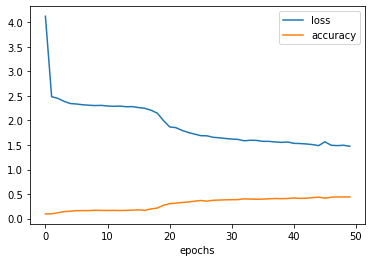

In [116]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [117]:
model5.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.5039 - accuracy: 0.4267


[1.5038974285125732, 0.42665234208106995]

In [118]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model6 = Sequential()
model6.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model6.add(layers.Activation('relu'))
model6.add(layers.MaxPooling1D(pool_size=(8)))
model6.add(layers.Dropout(0.2))
model6.add(layers.Conv1D(128, 5,padding='same'))
model6.add(layers.Activation('relu'))
model6.add(layers.MaxPooling1D(pool_size=(4)))
model6.add(layers.Dropout(0.1))
model6.add(layers.Conv1D(64, 5,padding='same'))
model6.add(layers.Activation('relu'))
model6.add(layers.MaxPooling1D(pool_size=(4)))
model6.add(layers.Dropout(0.1))
model6.add(layers.Flatten())
model6.add(layers.Dense(64))
model6.add(layers.Dense(12))
model6.add(layers.Activation('softmax'))

model6.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model6.fit(X_train, y_train,batch_size=10, epochs=100)

Epoch 1/100
559/559 [==============================] - 4s 5ms/step - loss: 4.0531 - accuracy: 0.1371
Epoch 2/100
559/559 [==============================] - 3s 5ms/step - loss: 2.1954 - accuracy: 0.2061
Epoch 3/100
559/559 [==============================] - 3s 5ms/step - loss: 1.8958 - accuracy: 0.2982
Epoch 4/100
559/559 [==============================] - 3s 5ms/step - loss: 1.8145 - accuracy: 0.3198
Epoch 5/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7510 - accuracy: 0.3335
Epoch 6/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7356 - accuracy: 0.3403
Epoch 7/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6907 - accuracy: 0.3578
Epoch 8/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6604 - accuracy: 0.3645
Epoch 9/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6589 - accuracy: 0.3675
Epoch 10/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6300 - accura

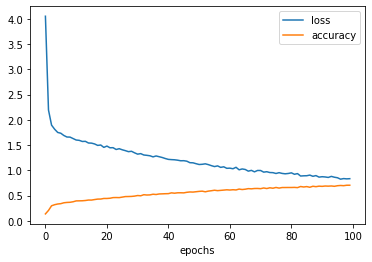

In [119]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [120]:
model6.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.5702 - accuracy: 0.4927


[1.5701971054077148, 0.49274584650993347]

In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model7 = Sequential()
model7.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model7.add(layers.Activation('relu'))
model7.add(layers.MaxPooling1D(pool_size=(8)))
model7.add(layers.Dropout(0.2))
model7.add(layers.Conv1D(128, 5,padding='same'))
model7.add(layers.Activation('relu'))
model7.add(layers.MaxPooling1D(pool_size=(4)))
model7.add(layers.Dropout(0.1))
model7.add(layers.Conv1D(64, 5,padding='same'))
model7.add(layers.Activation('relu'))
model7.add(layers.MaxPooling1D(pool_size=(4)))
model7.add(layers.Dropout(0.1))
model7.add(layers.Flatten())
model7.add(layers.Dense(64))
model7.add(layers.Dense(12))
model7.add(layers.Activation('softmax'))

model7.compile(optimizer=tf.keras.optimizers.experimental.Adam(lr=0.0015),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model7.fit(X_train, y_train,batch_size=10, epochs=100)

Epoch 1/100
559/559 [==============================] - 4s 5ms/step - loss: 4.5377 - accuracy: 0.1364
Epoch 2/100
559/559 [==============================] - 3s 5ms/step - loss: 2.1569 - accuracy: 0.2259
Epoch 3/100
559/559 [==============================] - 3s 5ms/step - loss: 1.9245 - accuracy: 0.2933
Epoch 4/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7780 - accuracy: 0.3412
Epoch 5/100
559/559 [==============================] - 3s 4ms/step - loss: 1.7190 - accuracy: 0.3489
Epoch 6/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7063 - accuracy: 0.3576
Epoch 7/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6682 - accuracy: 0.3661
Epoch 8/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6371 - accuracy: 0.3784
Epoch 9/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6411 - accuracy: 0.3709
Epoch 10/100
559/559 [==============================] - 3s 5ms/step - loss: 1.5956 - accura

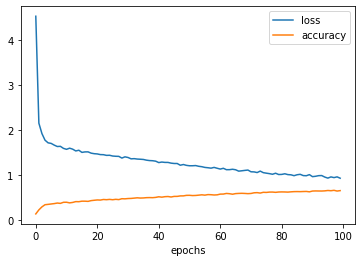

In [123]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [124]:
model7.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.4497 - accuracy: 0.4944


[1.449727177619934, 0.4943578839302063]

In [127]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model8 = Sequential()
model8.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model8.add(layers.Activation('relu'))
model8.add(layers.MaxPooling1D(pool_size=(8)))
model8.add(layers.Dropout(0.2))
model8.add(layers.Conv1D(128, 5,padding='same'))
model8.add(layers.Activation('relu'))
model8.add(layers.MaxPooling1D(pool_size=(4)))
model8.add(layers.Dropout(0.1))
model8.add(layers.Conv1D(64, 5,padding='same'))
model8.add(layers.Activation('relu'))
model8.add(layers.MaxPooling1D(pool_size=(4)))
model8.add(layers.Dropout(0.1))
model8.add(layers.Flatten())
model8.add(layers.Dense(64))
model8.add(layers.Dense(12))
model8.add(layers.Activation('softmax'))

model8.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model8.fit(X_train, y_train,batch_size=10, epochs=200)

Epoch 1/200
559/559 [==============================] - 5s 5ms/step - loss: 4.0606 - accuracy: 0.1303
Epoch 2/200
559/559 [==============================] - 3s 5ms/step - loss: 2.3055 - accuracy: 0.1736
Epoch 3/200
559/559 [==============================] - 3s 5ms/step - loss: 2.2087 - accuracy: 0.2166
Epoch 4/200
559/559 [==============================] - 3s 5ms/step - loss: 1.9541 - accuracy: 0.2795
Epoch 5/200
559/559 [==============================] - 3s 5ms/step - loss: 1.8026 - accuracy: 0.3216
Epoch 6/200
559/559 [==============================] - 3s 5ms/step - loss: 1.7514 - accuracy: 0.3268
Epoch 7/200
559/559 [==============================] - 3s 5ms/step - loss: 1.7106 - accuracy: 0.3429
Epoch 8/200
559/559 [==============================] - 3s 5ms/step - loss: 1.6688 - accuracy: 0.3559
Epoch 9/200
559/559 [==============================] - 3s 5ms/step - loss: 1.6506 - accuracy: 0.3600
Epoch 10/200
559/559 [==============================] - 3s 5ms/step - loss: 1.6394 - accura

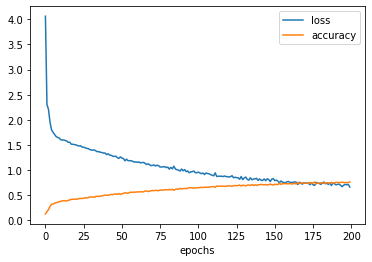

In [128]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [129]:
model8.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.7344 - accuracy: 0.4917


[1.7343859672546387, 0.4916711449623108]

In [132]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model9 = Sequential()
model9.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model9.add(layers.Activation('relu'))
model9.add(layers.MaxPooling1D(pool_size=(8)))
model9.add(layers.Dropout(0.2))
model9.add(layers.Conv1D(128, 5,padding='same'))
model9.add(layers.Activation('relu'))
model9.add(layers.MaxPooling1D(pool_size=(4)))
model9.add(layers.Dropout(0.1))
model9.add(layers.Conv1D(64, 5,padding='same'))
model9.add(layers.Activation('relu'))
model9.add(layers.MaxPooling1D(pool_size=(4)))
model9.add(layers.Dropout(0.1))
model9.add(layers.Flatten())
model9.add(layers.Dense(128))
model9.add(layers.Dense(12))
model9.add(layers.Activation('softmax'))

model9.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model9.fit(X_train, y_train,batch_size=10, epochs=100)

Epoch 1/100
559/559 [==============================] - 4s 4ms/step - loss: 4.0205 - accuracy: 0.1261
Epoch 2/100
559/559 [==============================] - 2s 4ms/step - loss: 2.3199 - accuracy: 0.1525
Epoch 3/100
559/559 [==============================] - 2s 4ms/step - loss: 2.2437 - accuracy: 0.1869
Epoch 4/100
559/559 [==============================] - 3s 5ms/step - loss: 2.0300 - accuracy: 0.2360
Epoch 5/100
559/559 [==============================] - 2s 4ms/step - loss: 1.9295 - accuracy: 0.2754
Epoch 6/100
559/559 [==============================] - 2s 4ms/step - loss: 1.8328 - accuracy: 0.2930
Epoch 7/100
559/559 [==============================] - 2s 4ms/step - loss: 1.7767 - accuracy: 0.3143
Epoch 8/100
559/559 [==============================] - 2s 4ms/step - loss: 1.7568 - accuracy: 0.3290
Epoch 9/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7089 - accuracy: 0.3478
Epoch 10/100
559/559 [==============================] - 2s 4ms/step - loss: 1.7018 - accura

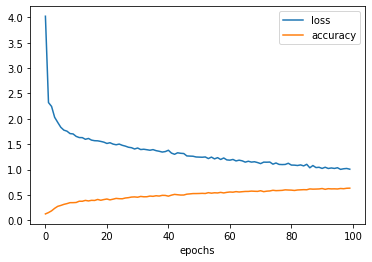

In [133]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [134]:
model9.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.4783 - accuracy: 0.4997


[1.4783363342285156, 0.4997313320636749]

In [138]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model10 = Sequential()
model10.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model10.add(layers.Activation('relu'))
model10.add(layers.MaxPooling1D(pool_size=(8)))
model10.add(layers.Dropout(0.2))
model10.add(layers.Conv1D(128, 5,padding='same'))
model10.add(layers.Activation('relu'))
model10.add(layers.MaxPooling1D(pool_size=(4)))
model10.add(layers.Dropout(0.1))
model10.add(layers.Conv1D(64, 5,padding='same'))
model10.add(layers.Activation('relu'))
model10.add(layers.MaxPooling1D(pool_size=(4)))
model10.add(layers.Dropout(0.1))
model10.add(layers.Flatten())
model10.add(layers.Dense(128))
model10.add(layers.Dense(64))
model10.add(layers.Dense(32))
model10.add(layers.Dense(12))
model10.add(layers.Activation('softmax'))

model10.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model10.fit(X_train, y_train,batch_size=10, epochs=100)

Epoch 1/100
559/559 [==============================] - 5s 5ms/step - loss: 4.0706 - accuracy: 0.1378
Epoch 2/100
559/559 [==============================] - 3s 5ms/step - loss: 2.2605 - accuracy: 0.1826
Epoch 3/100
559/559 [==============================] - 3s 5ms/step - loss: 2.0879 - accuracy: 0.2439
Epoch 4/100
559/559 [==============================] - 3s 5ms/step - loss: 1.9330 - accuracy: 0.2863
Epoch 5/100
559/559 [==============================] - 3s 5ms/step - loss: 1.8381 - accuracy: 0.3025
Epoch 6/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7950 - accuracy: 0.3283
Epoch 7/100
559/559 [==============================] - 3s 5ms/step - loss: 1.7631 - accuracy: 0.3318
Epoch 8/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6867 - accuracy: 0.3593
Epoch 9/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6512 - accuracy: 0.3693
Epoch 10/100
559/559 [==============================] - 3s 5ms/step - loss: 1.6373 - accura

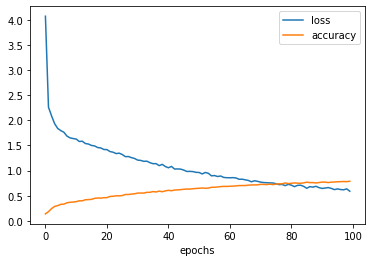

In [139]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [140]:
model10.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 1.6789 - accuracy: 0.4911


[1.6788740158081055, 0.49113380908966064]

In [144]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model11 = Sequential()
model11.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model11.add(layers.Activation('relu'))
model11.add(layers.MaxPooling1D(pool_size=(8)))
model11.add(layers.Dropout(0.2))
model11.add(layers.Conv1D(128, 5,padding='same'))
model11.add(layers.Activation('relu'))
model11.add(layers.MaxPooling1D(pool_size=(4)))
model11.add(layers.Dropout(0.1))
model11.add(layers.Conv1D(64, 5,padding='same'))
model11.add(layers.Activation('relu'))
model11.add(layers.MaxPooling1D(pool_size=(4)))
model11.add(layers.Dropout(0.1))
model11.add(layers.Flatten())
model11.add(layers.Dense(128))
model11.add(layers.Dense(64))
model11.add(layers.Dense(32))
model11.add(layers.Dense(12))
model11.add(layers.Activation('softmax'))

model11.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model11.fit(X_train, y_train,batch_size=10, epochs=200)

Epoch 1/200
559/559 [==============================] - 5s 5ms/step - loss: 4.4429 - accuracy: 0.1258
Epoch 2/200
559/559 [==============================] - 3s 5ms/step - loss: 2.2869 - accuracy: 0.1670
Epoch 3/200
559/559 [==============================] - 3s 5ms/step - loss: 2.1649 - accuracy: 0.2211
Epoch 4/200
559/559 [==============================] - 3s 5ms/step - loss: 1.9545 - accuracy: 0.2711
Epoch 5/200
559/559 [==============================] - 3s 5ms/step - loss: 1.8601 - accuracy: 0.3042
Epoch 6/200
559/559 [==============================] - 3s 5ms/step - loss: 1.8195 - accuracy: 0.3198
Epoch 7/200
559/559 [==============================] - 3s 5ms/step - loss: 1.7614 - accuracy: 0.3300
Epoch 8/200
559/559 [==============================] - 3s 5ms/step - loss: 1.7300 - accuracy: 0.3451
Epoch 9/200
559/559 [==============================] - 3s 5ms/step - loss: 1.6776 - accuracy: 0.3634
Epoch 10/200
559/559 [==============================] - 3s 5ms/step - loss: 1.6574 - accura

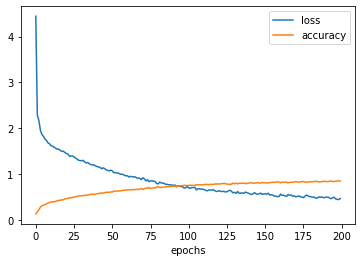

In [145]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [146]:
model11.evaluate(X_test, y_test)

59/59 [==============================] - 0s 3ms/step - loss: 2.0341 - accuracy: 0.4895


[2.0341403484344482, 0.4895217716693878]